#### Group Members - Chirag Chandrashekar, Chris Alexander, Viveka Salinamakki


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Importing the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, max_error, explained_variance_score

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
seasons_list = [
    '2004-2005',
    '2005-2006',
    '2006-2007',
    '2007-2008',
    '2008-2009',
    '2009-2010',
    '2010-2011',
    '2011-2012',
    '2012-2013',
    '2013-2014',
    '2014-2015',
    '2015-2016',
    '2016-2017',
    '2017-2018',
    '2018-2019',
    '2019-2020',
    '2020-2021',
    '2021-2022',
    '2022-2023',
    '2023-2024'
]

In [3]:
# for season in seasons_list:
pl_data_list = [pd.read_csv(f"..\Data\pl_stats_{season}.csv").assign(Season=season[0:4]).sort_values(by='Rk', axis=0) for season in seasons_list]

In [4]:
pl_data = pd.concat(pl_data_list, ignore_index=True)
len(pl_data.isna().sum()[pl_data.isna().sum()>200])

134

In [5]:
pl_data.shape

(400, 197)

In [6]:
pl_injury = pd.read_csv("../Data/20years_plteam_injury.csv", names=['Season', 'Squad', 'Games_injured'], skiprows=1 )

In [7]:
pl_injury.isna().sum()

Season           0
Squad            0
Games_injured    0
dtype: int64

In [8]:
pl_injury["Season"]=pl_injury["Season"].astype(str)

In [9]:
import json

with open(r"..\Data\team_actual_name.json", "r") as fp:
    team_actual_name = json.load(fp)

In [10]:
team_actual_name

{'manchester-city': 'Manchester City',
 'fc-arsenal': 'Arsenal',
 'fc-chelsea': 'Chelsea',
 'fc-liverpool': 'Liverpool',
 'tottenham-hotspur': 'Tottenham',
 'manchester-united': 'Manchester Utd',
 'aston-villa': 'Aston Villa',
 'newcastle-united': 'Newcastle Utd',
 'brighton-amp-hove-albion': 'Brighton',
 'west-ham-united': 'West Ham',
 'fc-brentford': 'Brentford',
 'crystal-palace': 'Crystal Palace',
 'nottingham-forest': "Nott'ham Forest",
 'afc-bournemouth': 'Bournemouth',
 'fc-everton': 'Everton',
 'wolverhampton-wanderers': 'Wolves',
 'fc-fulham': 'Fulham',
 'fc-burnley': 'Burnley',
 'leicester-city': 'Leicester City',
 'leeds-united': 'Leeds United',
 'fc-southampton': 'Southampton',
 'sheffield-united': 'Sheffield Utd',
 'luton-town': 'Luton Town',
 'hull-city': 'Hull City',
 'afc-sunderland': 'Sunderland',
 'fc-middlesbrough': 'Middlesbrough',
 'norwich-city': 'Norwich City',
 'fc-watford': 'Watford',
 'stoke-city': 'Stoke City',
 'fc-arsenal-u23': 'Arsenal FC U21',
 'coventry-

In [11]:
pl_injury['Squad'] = pl_injury['Squad'].map(team_actual_name)

In [12]:
pl_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         400 non-null    object
 1   Squad          400 non-null    object
 2   Games_injured  400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB



<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In [13]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [14]:
data_pressing = pl_data.loc[:,def_pressing_stats]

In [15]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [16]:
possession_stats = ['Pts','Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [17]:
data_possession = pl_data.loc[:,possession_stats]

In [18]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Pts', 'Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd',
        'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%',
        'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis',
        'Rec', 'PrgR'],
       dtype='object'))

In [19]:
len(data_pressing), len(data_possession), pl_data['Squad']

(400,
 400,
 0              Chelsea
 1              Arsenal
 2       Manchester Utd
 3              Everton
 4            Liverpool
             ...       
 395            Everton
 396    Nott'ham Forest
 397         Luton Town
 398            Burnley
 399      Sheffield Utd
 Name: Squad, Length: 400, dtype: object)

In [20]:
squad_names=pl_data['Squad']
data_pressing_possession = data_pressing.merge(data_possession)

In [21]:
data_pressing_possession_corr = data_pressing_possession.corr()

In [22]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

<AxesSubplot:>

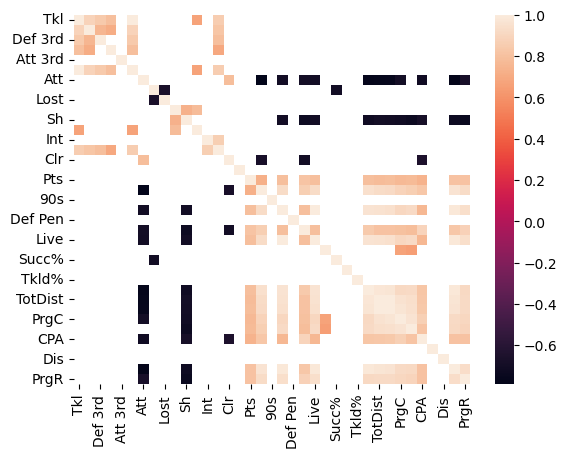

In [23]:
sns.heatmap(data_pressing_possession_corr)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Visualizations

In [24]:
plot_data = pd.read_csv("../Data/pl_stats.csv").sort_values(by='Rk', axis=0)

In [25]:
plot_data_possession = plot_data.loc[:,possession_stats]
plot_data_pressing = plot_data.loc[:,def_pressing_stats]

squad_names=plot_data['Squad']

plot_data_pressing_possession = plot_data_pressing.merge(plot_data_possession).set_index(squad_names)

In [26]:
plot_data_pressing_possession.index, plot_data_pressing_possession.columns

(Index(['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd',
        'Liverpool', 'Brighton', 'Aston Villa', 'Tottenham', 'Brentford',
        'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham',
        'Bournemouth', 'Nott'ham Forest', 'Everton', 'Leicester City',
        'Leeds United', 'Southampton'],
       dtype='object', name='Squad'),
 Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Pts',
        'Poss', '90s', 'Touches', 'Def Pen', 'Att Pen', 'Live', 'Succ', 'Succ%',
        'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA',
        'Mis', 'Dis', 'Rec', 'PrgR'],
       dtype='object'))

In [27]:
plot_data_pressing_possession_corr = plot_data_pressing_possession.corr()
plot_data_pressing_possession_corr = plot_data_pressing_possession_corr[abs(plot_data_pressing_possession_corr)>0.65]

plot_correlated_features = plot_data_pressing_possession_corr.loc[def_pressing_stats,possession_stats]

Text(0.5, 1.0, 'Correlation between Team pressing and Possession')

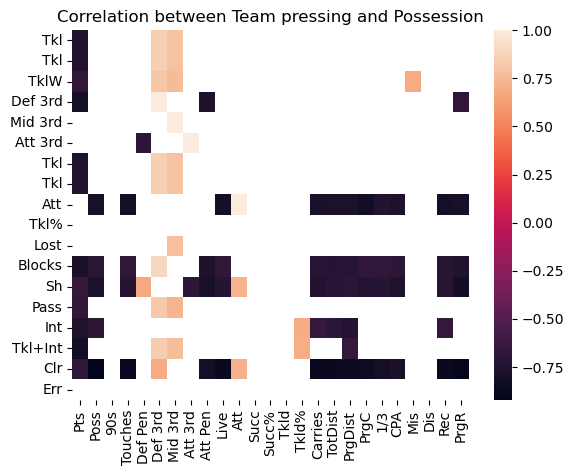

In [28]:
sns.heatmap(plot_correlated_features)
plt.title("Correlation between Team pressing and Possession")

[]

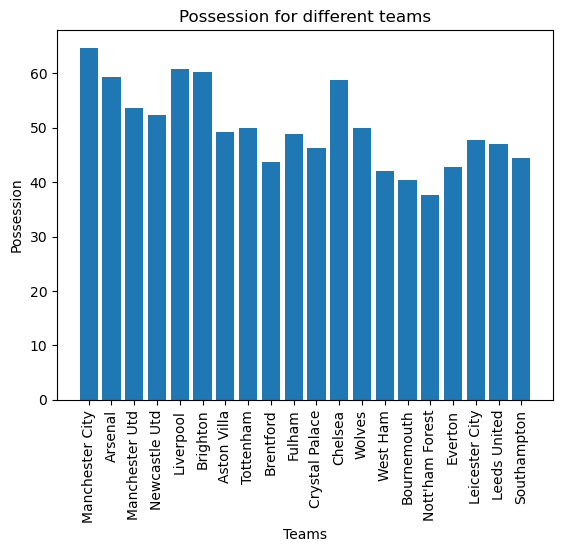

In [29]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(plot_data_pressing_possession.index,plot_data_pressing_possession['Poss'])
plt.title("Possession for different teams")
plt.ylabel("Possession")
plt.xlabel("Teams")
plt.plot()

In [30]:
defensive_action = ['Squad', 'Blocks', 'Sh', 'Pass', 'Tkl+Int']

In [31]:
plot_data_defensive_action = plot_data.loc[:,defensive_action]

In [32]:
plot_data_defensive_action['aggregate'] = plot_data_defensive_action['Blocks'] + plot_data_defensive_action['Sh'] + plot_data_defensive_action['Pass']

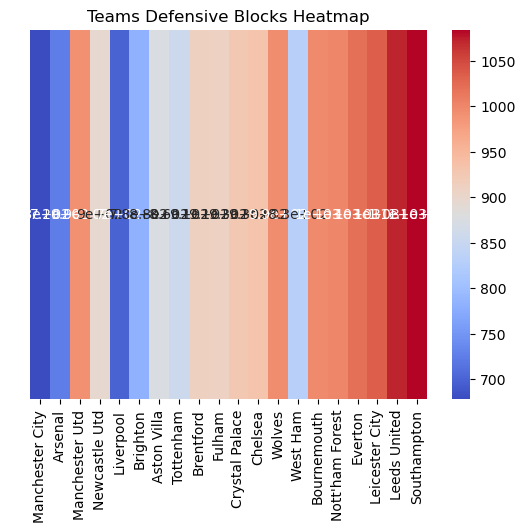

In [33]:
heatmap_data = pd.DataFrame(plot_data_defensive_action["aggregate"]).transpose()
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, yticklabels=False)
plt.xticks(np.arange(0.5, len(plot_data_defensive_action['Squad'])), plot_data_defensive_action['Squad'], rotation=90)
plt.title("Teams Defensive Blocks Heatmap")
plt.show()

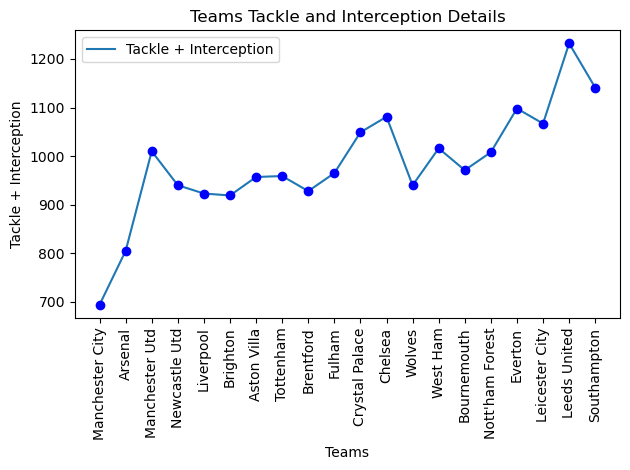

In [34]:
plt.plot(plot_data_defensive_action['Squad'], plot_data_defensive_action["Tkl+Int"], label='Tackle + Interception')

plt.scatter(plot_data_defensive_action['Squad'], plot_data_defensive_action["Tkl+Int"], color='blue', zorder=5)

plt.xticks(rotation=90)

plt.ylabel("Tackle + Interception")
plt.xlabel("Teams")
plt.title("Teams Tackle and Interception Details")

plt.legend()

plt.tight_layout()
plt.show()

In [35]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [36]:
plot_data_shot_creation = plot_data.loc[:,shot_goal_creation_stats]

In [37]:
# plot_data_pressing_shot = plot_data_pressing.merge(plot_data_shot_creation).set_index(squad_names)

The total distance covered by the team indicates the amount of pressing performed by the team

In [38]:
sns.set(style='dark', palette='deep')

[]

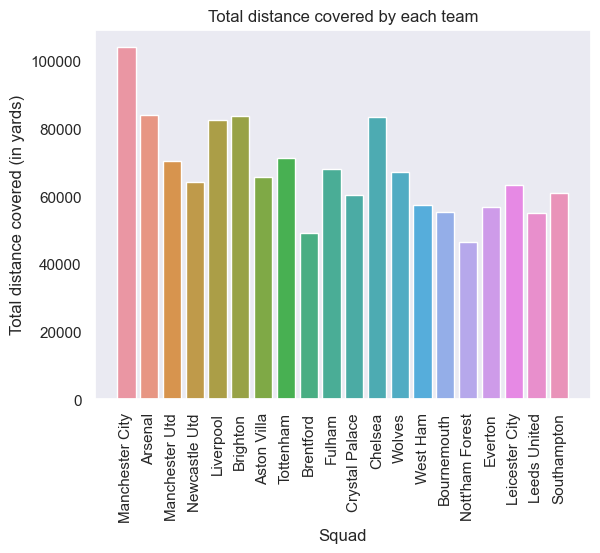

In [39]:
sns.barplot(x=plot_data_pressing_possession.index, y=plot_data_pressing_possession['TotDist'])
plt.xticks(rotation=90)
plt.ylabel("Total distance covered (in yards)")
# plt.legend()
plt.title("Total distance covered by each team")
plt.plot()
# plot_data(data_pressing_possession, ['TotDist'])

Let us plot the data to confirm that Machester City's distance covered is an anomaly

[]

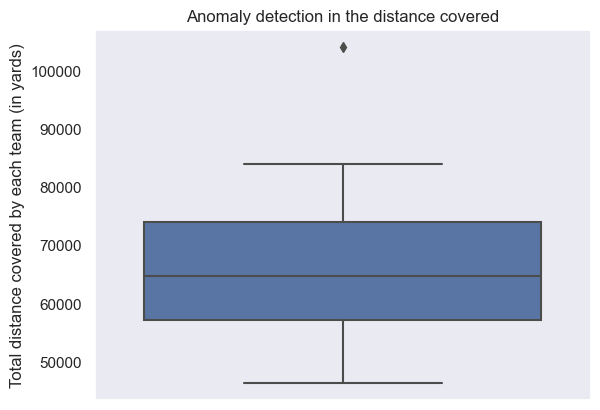

In [40]:
sns.boxplot(y=plot_data_pressing_possession['TotDist'])
plt.title("Anomaly detection in the distance covered")
plt.ylabel("Total distance covered by each team (in yards)")
plt.plot()

Let us look at the take-ons attempted to understand number of dribbles being attempted by a team

[]

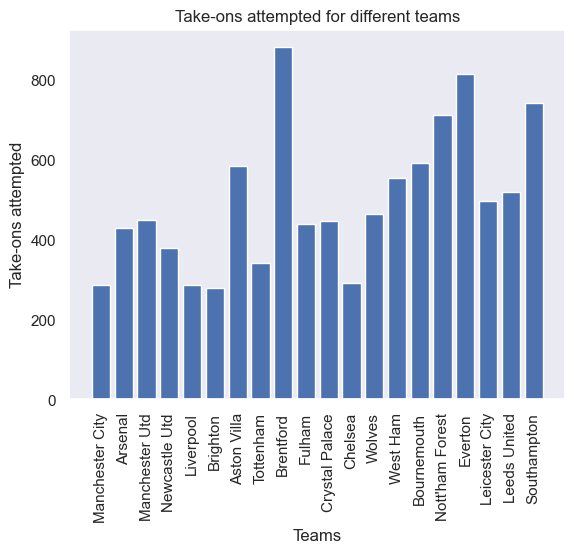

In [41]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(plot_data_pressing_possession.index,plot_data_pressing_possession['Att'])
plt.title("Take-ons attempted for different teams")
plt.ylabel("Take-ons attempted")
plt.xlabel("Teams")
plt.plot()

This shows that Brentford have a unusually high number of take-ons attempted. Comparing it to the total distance covered by the teams overall, it has a low distance covered. This says that Brentford sit deep and put pressure on the opponents when the time is right which is also working very effectively as shown in the number tof take-ons attempted.

So they have a very good and effective game plan. This is really good considering the fact that they were promoted to the premier league just the previous season.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Merging Injury data with pl_data and repeat the same to take relevant correlated columns

In [42]:
merged_df = pd.merge(pl_data, pl_injury, on=['Season', 'Squad'])

In [43]:
merged_df

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,...,Fld.2,Int.1,TklW.1,OG.1,Recov,Won,Lost.1,Won%,Last 5,Games_injured
0,Chelsea,1,38,29,8,1,72,15,57,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463
1,Arsenal,2,38,25,8,5,87,36,51,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618
2,Manchester Utd,3,38,22,11,5,58,26,32,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728
3,Everton,4,38,18,7,13,45,46,-1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281
4,Liverpool,5,38,17,7,14,52,41,11,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Everton,16,32,9,8,15,32,48,-16,29,...,294.0,312.0,370.0,3.0,1677.0,577.0,491.0,54.0,L L D W L,227
396,Nott'ham Forest,17,33,7,9,17,42,58,-16,26,...,322.0,283.0,364.0,2.0,1551.0,513.0,488.0,51.2,D D W L D,371
397,Luton Town,18,33,6,7,20,46,70,-24,25,...,385.0,291.0,319.0,4.0,1664.0,560.0,551.0,50.4,D L L W L,373
398,Burnley,19,33,4,8,21,33,68,-35,20,...,316.0,234.0,298.0,3.0,1482.0,501.0,635.0,44.1,W D D L D,323


Some feature have too many Nan values. This is beacuse some metrics were not being recorded or calculated as the emergence of data analysis in sports is a recent advancement. 

As the number of nan values points are alot we cannot just drop them and adding 0 or mean value will just skew the data. So we will just use feature which does not have nan values.

In [44]:
df_no_nan = merged_df[merged_df.columns[merged_df.isna().sum() == 0]]

# Display the columns with no NaN values
print("Columns with no NaN values:")
print(len(df_no_nan.columns))

Columns with no NaN values:
59


In [45]:
clean_data = df_no_nan.copy()

In [46]:
clean_data["Season"]=clean_data["Season"].astype(int)
clean_data.drop(columns=["Top Team Scorer", "Goalkeeper"], inplace=True)
# clean_data = pd.get_dummies(clean_data, columns=['Squad'])
clean_data.set_index('Squad')
clean_data.head()

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,...,SoT,SoT/90,G/SoT,PK.1,PKatt.2,# Pl.3,90s.3,Fls,Season,Games_injured
0,Chelsea,1,38,29,8,1,72,15,57,95,...,310,8.16,0.21,5,6,30,38.0,479,2004,463
1,Arsenal,2,38,25,8,5,87,36,51,83,...,301,7.92,0.28,3,4,25,38.0,441,2004,618
2,Manchester Utd,3,38,22,11,5,58,26,32,77,...,337,8.87,0.16,3,4,26,38.0,477,2004,728
3,Everton,4,38,18,7,13,45,46,-1,61,...,173,4.55,0.25,2,3,22,38.0,508,2004,281
4,Liverpool,5,38,17,7,14,52,41,11,58,...,245,6.45,0.19,3,5,29,38.0,430,2004,680


Mapping the squads to convert names to numbers

In [47]:
squads = clean_data['Squad'].unique()

squad_mapping = {squad: idx + 1 for idx, squad in enumerate(squads)}

print(squad_mapping)

{'Chelsea': 1, 'Arsenal': 2, 'Manchester Utd': 3, 'Everton': 4, 'Liverpool': 5, 'Bolton': 6, 'Middlesbrough': 7, 'Manchester City': 8, 'Tottenham': 9, 'Aston Villa': 10, 'Charlton Ath': 11, 'Birmingham City': 12, 'Fulham': 13, 'Newcastle Utd': 14, 'Blackburn': 15, 'Portsmouth': 16, 'West Brom': 17, 'Crystal Palace': 18, 'Norwich City': 19, 'Southampton': 20, 'West Ham': 21, 'Wigan Athletic': 22, 'Sunderland': 23, 'Reading': 24, 'Sheffield Utd': 25, 'Watford': 26, 'Derby County': 27, 'Stoke City': 28, 'Hull City': 29, 'Wolves': 30, 'Burnley': 31, 'Blackpool': 32, 'Swansea City': 33, 'QPR': 34, 'Cardiff City': 35, 'Leicester City': 36, 'Bournemouth': 37, 'Brighton': 38, 'Huddersfield': 39, 'Leeds United': 40, 'Brentford': 41, "Nott'ham Forest": 42, 'Luton Town': 43}


In [48]:
clean_data['Squad'] = clean_data['Squad'].map(squad_mapping)

Dropping `G-PK` and `PK` as they are the totals for the season and we are calculating the average for each game

In [49]:
clean_data.drop(['G-PK', 'PK'], axis=1, inplace=True)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Prediction of Injury and average goals per game using the pressing and possession data

Split the dataset

In [50]:
X = clean_data.drop(['Games_injured', 'G-PK.1'], axis=1)  # Features
y_injuries = clean_data['Games_injured']  # Predicting number of injuries
y_gpg = clean_data['G-PK.1']     # Predicting team goals per game

# Split data into training and testing sets
X_train, X_test, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)
X_train, X_test, y_train_gpg, y_test_gpg = train_test_split(X, y_gpg, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### PCA for Dimensionality Reduction

In [51]:
pca = PCA(n_components=0.95)  # retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [52]:
explained_var_pca = pca.explained_variance_ratio_

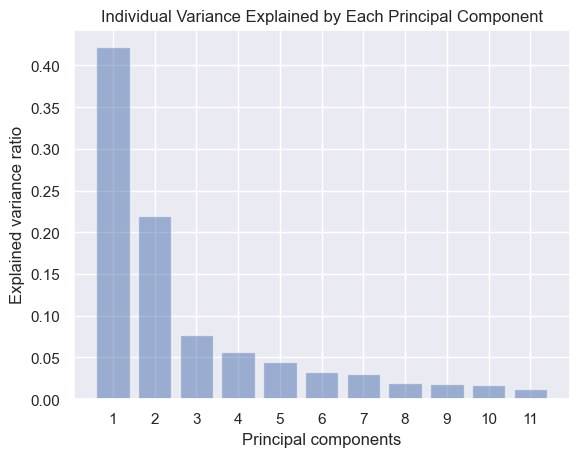

In [53]:
plt.figure()
plt.bar(range(1, len(explained_var_pca) + 1), explained_var_pca, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_var_pca) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

In [54]:
X_train_Df = pd.DataFrame(data = X_train_pca)

In [55]:
X_train_Df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.925696,-1.254695,2.194192,-1.158661,-1.061930,-3.043893,0.159245,0.562933,-0.705069,0.001021,1.623828
1,-5.057190,-1.516919,1.895776,1.315445,1.846908,-2.187292,3.669367,-0.227732,0.239628,0.127414,0.372893
2,6.321079,-0.457783,-0.185500,1.461367,0.317901,1.776533,-0.678497,-0.050599,-0.125738,0.599556,0.841576
3,-1.953274,-0.349083,-1.318673,0.615770,-0.611807,0.622075,0.100911,0.899019,0.774001,-0.422886,0.887515
4,-3.229984,-0.535391,-1.099898,-3.791653,2.121450,0.166736,-0.019106,0.007841,0.385296,-0.612553,0.002894


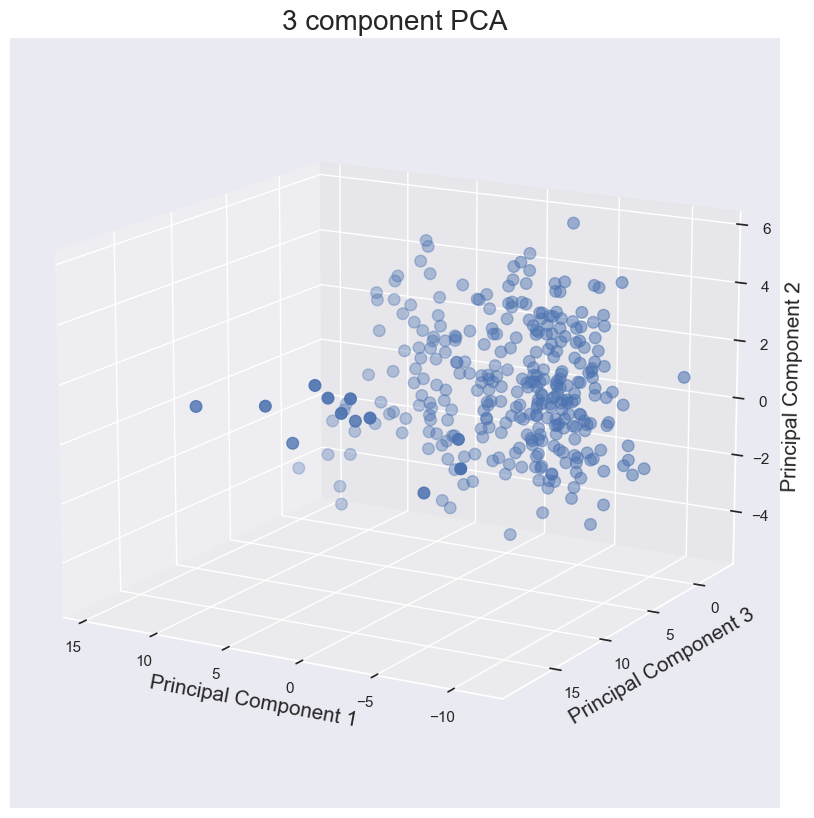

In [56]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_zlabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

# targetsName = ['MALE', 'FEMALE']

# targets = list(df['Property Class'].unique())
# colors = ['orange', 'g', 'blue']
# colors = ['#FFA500', '#90EE90', '#006400', '#87CEEB', '#4169E1', '#000080', '#40E0D0']

ax.scatter(  X_train_Df.loc[:,0]
               , X_train_Df.loc[:,1]
               , X_train_Df.loc[:,2]
               , s = 70)

ax.grid()
ax.view_init(15, 120)  # ax.view_init(elev, azim)

In [57]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    max_err = max_error(y_test, predictions)
    explained_var = explained_variance_score(y_test, predictions)
    print(f"RMSE: {mse}, Max error:{max_err}\n")

#### Linear Regression

In [58]:
print("\nLinear Regression for Injuries:")
train_evaluate(LinearRegression(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("Linear Regression for Goals per game:")
train_evaluate(LinearRegression(), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)



Linear Regression for Injuries:
RMSE: 98.72272661662329, Max error:425.9771410215904

Linear Regression for Goals per game:
RMSE: 0.05400044524555812, Max error:0.15627146954239157



#### ElasticNet

In [59]:
print("ElasticNet for Injuries:")
train_evaluate(ElasticNet(random_state=0), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("ElasticNet for Goals per game:")
train_evaluate(ElasticNet(random_state=0), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)

ElasticNet for Injuries:
RMSE: 97.92279519237646, Max error:421.95831850218434

ElasticNet for Goals per game:
RMSE: 0.19642126771852866, Max error:0.5484638666176997



#### Poisson Regression

In [60]:
print("Poisson Regression for Injuries:")
train_evaluate(PoissonRegressor(solver='newton-cholesky'), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("Poisson Regression for Goals per game:")
train_evaluate(PoissonRegressor(solver='newton-cholesky'), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)

Poisson Regression for Injuries:
RMSE: 98.35972071008675, Max error:422.81120323376734

Poisson Regression for Goals per game:
RMSE: 0.07948176035869024, Max error:0.26358391317960583



#### SVR

In [61]:
print("SVM Regression for Injuries:")
train_evaluate(SVR(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("SVM Regression for Goals per game:")
train_evaluate(SVR(), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)


SVM Regression for Injuries:
RMSE: 106.10123639062792, Max error:390.53669701252085

SVM Regression for Goals per game:
RMSE: 0.09490783766507511, Max error:0.29006385883289365



#### Decision Tree

In [62]:
print("Decision Tree Regression for Injuries:")
train_evaluate(DecisionTreeRegressor(random_state=42), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("Decision Tree Regression for Goals per game:")
train_evaluate(DecisionTreeRegressor(random_state=42), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)

Decision Tree Regression for Injuries:
RMSE: 155.03600388296906, Max error:513.0

Decision Tree Regression for Goals per game:
RMSE: 0.1663392617513977, Max error:0.5800000000000001



#### Random Forest

In [63]:
print("Random Forest Regression for Injuries:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

print("Random Forest Regression for Goals per game:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)


Random Forest Regression for Injuries:
RMSE: 100.02411296782391, Max error:407.8

Random Forest Regression for Goals per game:
RMSE: 0.11599740568219619, Max error:0.3645000000000007

